# Algoritmos de clasificación de imágenes con CIFAR-10

TODO: Descripción del notebook

## Importar librerías

In [1]:
# Agregar librerías para análisis de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importar sklearn
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, RocCurveDisplay

# Importar CIFAR-10 desde Keras
from keras.datasets import cifar10

2026-01-22 16:02:43.151255: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2026-01-22 16:02:43.180705: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2026-01-22 16:02:43.180734: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2026-01-22 16:02:43.180758: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2026-01-22 16:02:43.186247: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2026-01-22 16:02:43.186760: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

## Preparación y exploración de los datos

### Cargar datos CIFAR-10

Cargamos el conjunto de imágenes obtenidos desde la librería Keras.

In [2]:
# Cargar el dataset CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(f'Tamaño del conjunto de entrenamiento: {X_train.shape}, Etiquetas: {y_train.shape}')
print(f'Tamaño del conjunto de prueba: {X_test.shape}, Etiquetas: {y_test.shape}')

Tamaño del conjunto de entrenamiento: (50000, 32, 32, 3), Etiquetas: (50000, 1)
Tamaño del conjunto de prueba: (10000, 32, 32, 3), Etiquetas: (10000, 1)


### Analizar la distribución de las clases

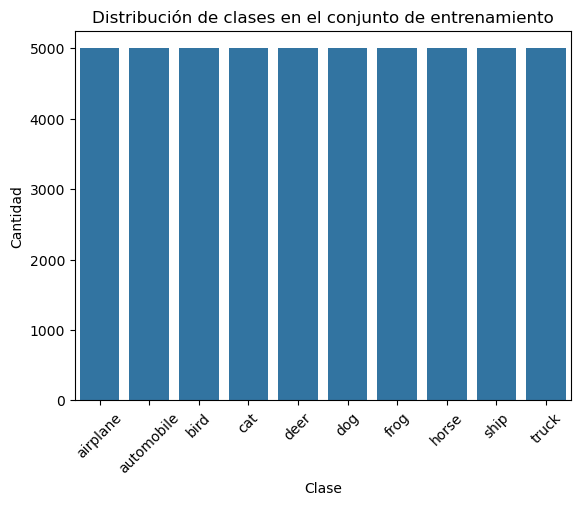

En total hay 10 clases:
Cada clase tiene 5000 imágenes en el conjunto de entrenamiento.


In [3]:
# Analizar la distribución de clases en el conjunto de entrenamiento
unique, counts = np.unique(y_train, return_counts=True)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

class_distribution = dict(zip(class_names, counts))

df_distribution = pd.DataFrame(list(class_distribution.items()), columns=['Clase', 'Cantidad'])

sns.barplot(x='Clase', y='Cantidad', data=df_distribution)
plt.title('Distribución de clases en el conjunto de entrenamiento')
plt.xticks(rotation=45)
plt.show()

print("En total hay {} clases:".format(len(class_names)))
print("Cada clase tiene {} imágenes en el conjunto de entrenamiento.".format(counts[0]))

### Visualizar algunas imágenes aleatorias junto con su etiqueta

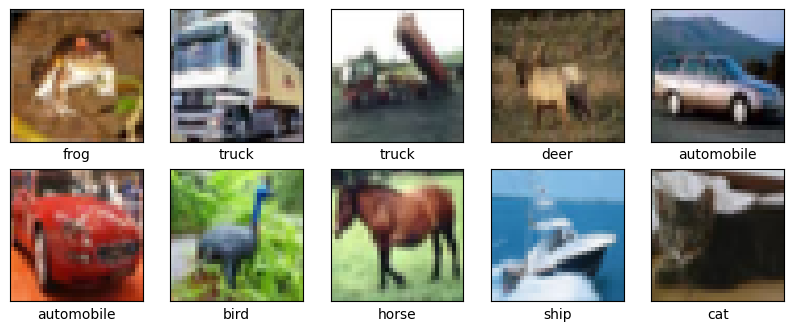

In [4]:
# Visualizar algunas imágenes del conjunto de entrenamiento


plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

### Normalizar valores de píxeles

In [5]:
# Normalizar los datos
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train = y_train.flatten()
y_test = y_test.flatten()

# Comprobar la normalización
print(f'Valores mínimos y máximos en X_train: {X_train.min()}, {X_train.max()}')
print(f'Valores mínimos y máximos en X_test: {X_test.min()}, {X_test.max()}')

Valores mínimos y máximos en X_train: 0.0, 1.0
Valores mínimos y máximos en X_test: 0.0, 1.0


En este caso, normalizamos los píxeles de las imágenes a valores entre 0 y 1, de forma que:

- Los modelos aprenden mejor cuando trabajan con rangos pequeños y uniformes (0, 1).
- Es más fácil para los modelos encontrar patrones y evitar sesgos por valores de píxeles más grandes.
- Se aplanan los datos para que cada imagen sea un vector compatible con los modelos utilizados.

## Definición del problema de clasificación

- Clasificación binaria:

    - En este caso, entrenaremos modelos para diferenciar entre las clases `Ship` y `No Ship`.

    - El modelo decide `sí` o `no` para cada imagen.

    - La proporción de las clases será aproximadamente `9:1` (1 clase minoritaria vs el resto).

    - Al tratarse de imágenes y haber una gran desproporción de datos, el modelo podría identificar muy bien los `No Ship` pero tener más dificultades con los `Ship`.

- Un problema multiclase.

    - Disponemos de `10 clases` en total.

    - Los modelos deben elegir entre `muchas opciones`.

    - El problema se vuelve más complejo y es más probable que se cometan más errores en la mayoría de clases.

    - Algunas clases podrían ser más dificil de distingir de otras.

## Entrenamiento de modelos

### Clasificación binaria

In [6]:
# Definimos semilla para reproducibilidad
np.random.seed(42)

# Target a comparar: Ship (clase 8) vs No-Ship
y_train_binary = (y_train == 8).astype(int)
y_test_binary = (y_test == 8).astype(int)

#### DummyClassifier

In [ ]:
# Clasificación binaria con DummyClassifier
dummy_clf_bin = DummyClassifier(strategy="stratified")
dummy_clf_bin.fit(X_train.reshape(X_train.shape[0], -1), y_train_binary)

# Configurar path para importar utils (desde el contenedor)
import sys
import os

# En el contenedor, el path base es /home/jovyan/work
work_dir = '/home/jovyan/work' if os.path.exists('/home/jovyan/work') else os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
if work_dir not in sys.path:
    sys.path.insert(0, work_dir)

# Importar y usar ModelManager
from utils.model_manager import ModelManager

mm = ModelManager()
mm.save_model(dummy_clf_bin, "dummy_classifier_binary", overwrite=True)
print("✓ Modelo guardado correctamente")

IndexError: 2

#### Evaluación

In [ ]:
# Matriz de confusión para DummyClassifier
y_pred_dummy = dummy_clf_bin.predict(X_test.reshape(X_test.shape[0], -1))
cm_dummy = confusion_matrix(y_test_binary, y_pred_dummy)
disp_dummy = ConfusionMatrixDisplay(confusion_matrix=cm_dummy, display_labels=['No Ship', 'Ship'])
disp_dummy.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión - DummyClassifier')
plt.show()

In [ ]:
print("\nNo ships correctamente clasificados (Verdaderos Negativos): ", cm_dummy[0][0])
print("No ships que fueron incorrectamente clasificados como ships (Falsos Positivos): ", cm_dummy[0][1])
print("Ships que no fueron detectados (Falsos Negativos):  ", cm_dummy[1][0])
print("Ships correctamente clasificados (Verdaderos Positivos): ", cm_dummy[1][1])

In [ ]:
print("Reporte de clasificación - DummyClassifier:")
print(classification_report(y_test_binary, y_pred_dummy, target_names=['No Ship', 'Ship']))

In [ ]:

y_scores_dummy = dummy_clf_bin.predict_proba(X_test.reshape(X_test.shape[0], -1))[:, 1]
roc_auc_dummy = roc_auc_score(y_test_binary, y_scores_dummy)
print(f"ROC AUC para DummyClassifier: {roc_auc_dummy:.4f}")

In [ ]:
RocCurveDisplay.from_estimator(dummy_clf_bin, X_test.reshape(X_test.shape[0], -1), y_test_binary)
plt.title('Curva ROC - DummyClassifier')
plt.show()

#### SGDClassifier

In [ ]:
# Modelo SGDClassifier para clasificación binaria
sgd_clf_bin = SGDClassifier(max_iter=1000, tol=1e-3)
sgd_clf_bin.fit(X_train.reshape(X_train.shape[0], -1), y_train_binary)

#### Evaluación

In [ ]:
# Matriz de confusión para SGDClassifier (binario)
y_pred_sgd = sgd_clf_bin.predict(X_test.reshape(X_test.shape[0], -1))
cm_sgd = confusion_matrix(y_test_binary, y_pred_sgd)
disp_sgd = ConfusionMatrixDisplay(confusion_matrix=cm_sgd, display_labels=['No Ship', 'Ship'])
disp_sgd.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión - SGDClassifier')
plt.show()

In [ ]:
print("Reporte de clasificación - SGDClassifier:")
print(classification_report(y_test_binary, y_pred_sgd, target_names=['No Ship', 'Ship'], zero_division=0))

In [ ]:
print("\nNo ships correctamente clasificados (Verdaderos Negativos): ", cm_sgd[0][0])
print("No ships que fueron incorrectamente clasificados como ships (Falsos Positivos): ", cm_sgd[0][1])
print("Ships que no fueron detectados (Falsos Negativos):  ", cm_sgd[1][0])
print("Ships correctamente clasificados (Verdaderos Positivos): ", cm_sgd[1][1])

In [ ]:
# ROC AUC para SGDClassifier
y_scores_sgd = sgd_clf_bin.decision_function(X_test.reshape(X_test.shape[0], -1))
roc_auc_sgd = roc_auc_score(y_test_binary, y_scores_sgd)
print(f"ROC AUC para SGDClassifier: {roc_auc_sgd:.4f}")

In [ ]:
# Representación de la curva ROC para SGDClassifier
RocCurveDisplay.from_estimator(sgd_clf_bin, X_test.reshape(X_test.shape[0], -1), y_test_binary)
plt.title('Curva ROC - SGDClassifier')
plt.show()

### Clasificación Multiclase

#### DummyClassifier

In [ ]:
dummy_clf_multi = DummyClassifier(strategy="stratified")
dummy_clf_multi.fit(X_train.reshape(X_train.shape[0], -1), y_train)

#### Evaluación

In [ ]:
y_train_pred_dummy = dummy_clf_multi.predict(X_train.reshape(X_train.shape[0], -1))
y_test_pred_dummy = dummy_clf_multi.predict(X_test.reshape(X_test.shape[0], -1))

cm_train_dummy = confusion_matrix(y_train, y_train_pred_dummy)
cm_test_dummy = confusion_matrix(y_test, y_test_pred_dummy)

# Convertir a DataFrame para mejor legibilidad
cm_test_df = pd.DataFrame(cm_test_dummy, index=class_names, columns=class_names)

# Mostrar como heatmap
plt.figure(figsize=(12,10))
sns.heatmap(cm_test_df, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - Dummy Classifier (Test)")
plt.ylabel("Clase real")
plt.xlabel("Clase predicha")
plt.show()

Según el reporte, podemos encontrar que:

- Para cada clase, el modelo tiene una precisión del 10% aproximadamente.-

In [ ]:
print("Reporte de clasificación para Dummy Classifier:\n")
print(classification_report(y_test, y_test_pred_dummy, target_names=class_names, zero_division=0))

#### SGDClassifier

In [ ]:
sgd_clf_multi = SGDClassifier(max_iter=1000, tol=1e-3)
sgd_clf_multi.fit(X_train.reshape(X_train.shape[0], -1), y_train)

#### Evaluación

In [ ]:
y_train_pred_sgd = sgd_clf_multi.predict(X_train.reshape(X_train.shape[0], -1))
y_test_pred_sgd = sgd_clf_multi.predict(X_test.reshape(X_test.shape[0], -1))

cm_train_sgd = confusion_matrix(y_train, y_train_pred_sgd)
cm_test_sgd = confusion_matrix(y_test, y_test_pred_sgd)

cm_test_sgd_df = pd.DataFrame(cm_test_sgd, index=class_names, columns=class_names)

plt.figure(figsize=(12,10))
sns.heatmap(cm_test_sgd_df, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - SGD Classifier (Test)")
plt.ylabel("Clase real")
plt.xlabel("Clase predicha")
plt.show()

In [ ]:
print("Reporte de clasificación para SGD Classifier en el conjunto de prueba:")
print(classification_report(y_test, y_test_pred_sgd, target_names=class_names))

## Conclusiones